In [73]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

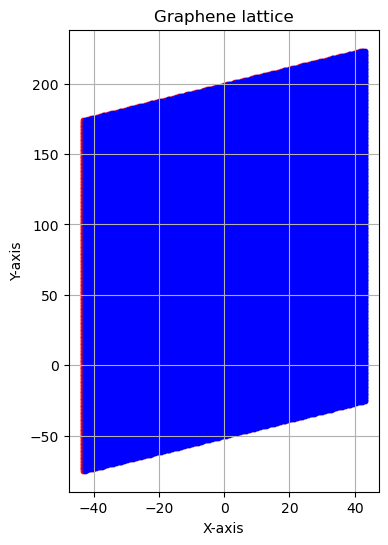

In [74]:
# Defining the Base lattice  - (TRIANGULAR LATICE)
# lattice translation vectors
A1 = [0, 1]
A2 = [np.sqrt(3)/2, 1/2]
# number of points along each direction vectors
n = 100
# Lattice generation and visualization
subL1_x = []
subL1_y = []
subL2_x = []
subL2_y = []
for i in range(-int(n/2), 2 * n):
    for j in range(- int(n/2), int(n/2)):
        subL1_x.append((A1[0] * i) + (A2[0] * j))
        subL1_y.append((A1[1] * i) + (A2[1] * j))
        subL2_x.append((A1[0] * i) + (A2[0] * j) + (1/np.sqrt(3)))
        subL2_y.append((A1[1] * i) + (A2[1] * j))
#print(triX_x)
#print(triX_y)
# Plot the points
g = plt.figure(figsize=(4, 6))
plt.scatter(subL1_x, subL1_y, color='red', s=10)
plt.scatter(subL2_x, subL2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Graphene lattice')
plt.grid(True)
plt.show()

32
32


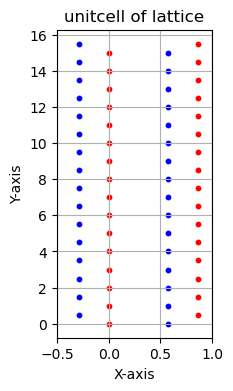

In [134]:
rows = 31 # use only odd number values
# Isolating a unit cell from graphene nanoribbon
unitcell1_x = []
unitcell1_y = []
unitcell2_x = []
unitcell2_y = []
# Bounds of unit cell
Ylow = -1/4
Yhigh = rows * 1/2
Xlow = -1/2
Xhigh = 1 
for i in range(len(subL1_x)):
    [x1, y1] = [subL1_x[i], subL1_y[i]]
    [x2, y2] = [subL2_x[i], subL2_y[i]]
    if x1 > Xlow and x1 < Xhigh and y1 >= Ylow and y1 <= Yhigh:
        unitcell1_x.append(x1)  
        unitcell1_y.append(y1)
    if x2 > Xlow and x2 < Xhigh and y2 >= Ylow and y2 <= Yhigh:
        unitcell2_x.append(x2)  
        unitcell2_y.append(y2)

print(len(unitcell1_x))
print(len(unitcell2_y))

g = plt.figure(figsize=(2, 4))
plt.scatter(unitcell1_x, unitcell1_y, color='red', s=10)
plt.scatter(unitcell2_x, unitcell2_y, color='blue', s=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('unitcell of lattice')
plt.grid(True)
plt.xlim(-0.5, 1)
plt.show()

In [135]:
# Translation vector
Tx = [np.sqrt(3), 0]
# neighbour table formation
L1D1 = [-1/(2*np.sqrt(3)), -1/2]
L1D2 = [1/np.sqrt(3), 0]
L1D3 = [-1/(2*np.sqrt(3)), 1/2]
L2D1 = [1/(2*np.sqrt(3)), -1/2]
L2D2 = [1/(2*np.sqrt(3)), 1/2]
L2D3 = [-1/np.sqrt(3), 0]

L1NN1 = []
L1NN2 = []
L1NN3 = []
L2NN1 = []
L2NN2 = []
L2NN3 = []

def neig_L1_1(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1] + int((rows/2) + (rows%2))], 6)):
        L1NN1.append(None)
    elif np.allclose([x1, y1], np.round([x + L1D1[0] , y + L1D1[1]], 6)):
        L1NN1.append(j)
    return 

def neig_L1_2(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D2[0], y + L1D2[1]], 6)):
        L1NN2.append(j)
    elif np.allclose([x1, y1], np.round([x + L1D2[0] - Tx[0], y + L1D2[1] - Tx[1]], 6)):
        L1NN2.append(j)
    return 

def neig_L1_3(i, j):
    [x, y] = np.round([unitcell1_x[i], unitcell1_y[i]], 6)
    [x1, y1] = np.round([unitcell2_x[j], unitcell2_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1] - int((rows/2) + (rows%2))], 6)):
        L1NN3.append(None)
    elif np.allclose([x1, y1], np.round([x + L1D3[0] , y + L1D3[1]], 6)):
        L1NN3.append(j)
    return 

def neig_L2_1(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1] + int((rows/2) + (rows%2))], 6)):
        L2NN1.append(None)
    elif np.allclose([x1, y1], np.round([x + L2D1[0] , y + L2D1[1]], 6)):
        L2NN1.append(j)
    return 

def neig_L2_2(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1] - int((rows/2) + (rows%2))], 6)):
        L2NN2.append(None)
    if np.allclose([x1, y1], np.round([x + L2D2[0] , y + L2D2[1]], 6)):
        L2NN2.append(j)
    return 

def neig_L2_3(i, j):
    [x, y] = np.round([unitcell2_x[i], unitcell2_y[i]], 6)
    [x1, y1] = np.round([unitcell1_x[j], unitcell1_y[j]], 6)
    # NN1 
    if np.allclose([x1, y1], np.round([x + L2D3[0] , y + L2D3[1]], 6)):
        L2NN3.append(j)
    elif np.allclose([x1, y1], np.round([x + L2D3[0] + Tx[0], y + L2D3[1] + Tx[1]], 6)):
        L2NN3.append(j)
    return 

for i in range(len(unitcell1_x)):
    for j in range(len(unitcell2_x)):
        neig_L1_1(i, j)
        neig_L1_2(i, j)
        neig_L1_3(i, j)
        neig_L2_1(i, j)
        neig_L2_2(i, j)
        neig_L2_3(i, j)
        
print(L1NN1)
print(L1NN2)
print(L1NN3)
print(L2NN1)
print(L2NN2)
print(L2NN3)

[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, None]
[None, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, None]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [136]:
# Hamiltonian definition
t = 1
def H(kx):
    sub = len(unitcell1_x)
    k = [kx, 0]
    Hij = np.zeros((2*sub, 2*sub), dtype=np.complex128)
    for i in range(0,len(unitcell1_x)):
        n2, n6= int(L1NN2[i]), int(L2NN3[i])
        Hij[i][n2 + sub] += t * np.exp(1j * np.dot(k, L1D2))
        Hij[i + sub][n6] += t * np.exp(1j * np.dot(k, L2D3))
        
        if L1NN1[i] is not None:
            n1 = int(L1NN1[i])
            Hij[i][n1 + sub] += t * np.exp(1j * np.dot(k, L1D1))
        if L1NN3[i] is not None:
            n3 = int(L1NN3[i])  
            Hij[i][n3 + sub] += t * np.exp(1j * np.dot(k, L1D3))
        if L2NN1[i] is not None:
            n4 = int(L2NN1[i])
            Hij[i + sub][n4] += t * np.exp(1j * np.dot(k, L2D1))
        if L2NN2[i] is not None:
            n5 = int(L2NN2[i])
            Hij[i + sub][n5] += t * np.exp(1j * np.dot(k, L2D2))
           
    return Hij 

In [137]:
BZ = np.linspace(-np.pi/Tx[0], np.pi/Tx[0], 100)

band = np.zeros((2 * len(unitcell1_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i]))
    for b_index in range(0, 2 * len(unitcell1_x)):
        band[b_index][i] = eigen[b_index]

100%|██████████| 100/100 [00:00<00:00, 359.44it/s]


(-1.8137993642342178, 1.8137993642342178)

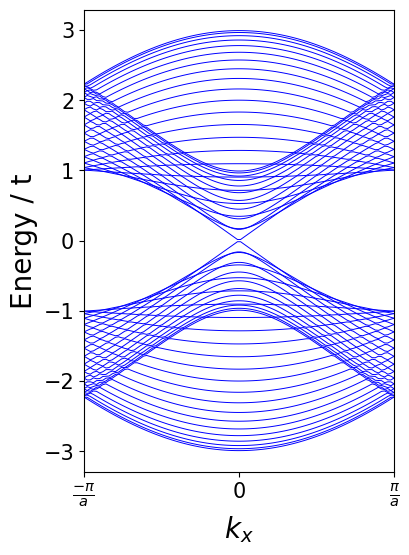

In [139]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, 2 * len(unitcell1_x)):
    plt.plot( BZ, band[b_index], c = 'blue', linestyle='-', linewidth = 0.7 )
plt.xlabel("$k_x$", fontsize=20);plt.axis('tight')
plt.ylabel("Energy / t", fontsize=20)
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
plt.xticks( [BZ[0], 0, BZ[-1]],[r'$\frac{-\pi}{a}$',  0, r'$\frac{\pi}{a}$'],fontsize=15)
plt.xlim(BZ[0], BZ[-1])
#plt.ylim(-0.6, 0.6)